Analisando o seu código original e cruzando com os requisitos do PDF, alguns ajustes podem ser feitos para garantir que ele atenda a todos os pontos solicitados:

### 1. **Análise Exploratória da Série Temporal**
   - **Sugestão:** adicionar mais coisas

### 2. **Divisão Cronológica dos Dados para Validação e Teste**
   - **Verificação:** A divisão dos dados em treinamento, validação e teste está correta, considerando que `train_size`, `val_size` e `test_size` foram calculados para manter os conjuntos separados.
   - **Sugestão:** Certifique-se de que essa divisão realmente representa uma sequência cronológica, pois o pedido enfatiza isso. Para garantir a cronologia, cada conjunto deve seguir a série sem misturar períodos, como você já fez.

### 4. **Documentação dos Hiperparâmetros Testados e Melhores Resultados**
   - **O que falta:** O código não registra ou apresenta os hiperparâmetros testados.
   - **Sugestão:** Além de testar várias configurações, armazene os valores de hiperparâmetros e métricas de desempenho (MAPE, MSE, RMSE) para cada configuração. Uma tabela com esses resultados ajudará na análise e escolha da melhor configuração para o relatório final.

### 5. **Cálculo das Métricas MAPE, MSE e RMSE no Conjunto de Teste**
   - **Verificação:** A linha de código que calcula MAPE e MSE já existe, mas RMSE não é calculado explicitamente.
   - **Sugestão:** Adicione o cálculo do RMSE, que é a raiz quadrada do MSE:
     ```python
     rmse = np.sqrt(mse)
     ```

### 6. **Comparação Visual entre Previsões e Valores Reais**
   - **O que falta:** O gráfico de comparação está implementado apenas para o conjunto de teste.
   - **Sugestão:** Inclua um gráfico similar para o conjunto de validação para que ele também seja comparado com os dados reais, conforme solicitado. Exemplo:
     ```python
     # Comparação no conjunto de validação
     y_val_pred = model.predict(X_val)
     y_val_pred_inv = scaler.inverse_transform(y_val_pred)
     y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

     plt.figure(figsize=(12, 6))
     plt.plot(y_val_inv, label="Valor Real - Validação")
     plt.plot(y_val_pred_inv, label="Previsão - Validação")
     plt.xlabel("Tempo")
     plt.ylabel("Valores")
     plt.legend()
     plt.title("Comparação de Previsão e Valores Reais no Conjunto de Validação")
     plt.show()
     ```

### Resumo das Modificações Sugeridas:
1. **Adicionar análise exploratória da série temporal.**
2. **Garantir a divisão cronológica para treino, validação e teste.**
3. **Implementar uma busca por hiperparâmetros e registrar cada configuração e suas métricas.**
4. **Documentar hiperparâmetros testados em uma tabela.**
5. **Calcular e exibir RMSE.**
6. **Adicionar gráficos para comparar os valores reais e previstos também no conjunto de validação.**

Essas modificações ajudariam a garantir que o código esteja completo e siga os requisitos do PDF.

In [323]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout
from numpy import array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from itertools import product
import tensorflow as tf

In [324]:
locale.setlocale(locale.LC_TIME, 'pt_BR')
pd.options.display.float_format = '{:,.2f}'.format

# Carregar o arquivo CSV fornecido pelo usuário
data = pd.read_csv('guima.csv', sep = ';')

# Exibir as primeiras linhas para entender o formato dos dados
data.head(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13 non-null     object
 1   2007        13 non-null     object
 2   2008        13 non-null     object
 3   2009        13 non-null     object
 4   2010        13 non-null     object
 5   2011        13 non-null     object
 6   2012        13 non-null     object
 7   2013        13 non-null     object
 8   2014        13 non-null     object
 9   2015        13 non-null     object
 10  2016        13 non-null     object
 11  2017        13 non-null     object
 12  2018        13 non-null     object
 13  2019        13 non-null     object
 14  2020        13 non-null     object
 15  2021        13 non-null     object
 16  2022        13 non-null     object
 17  2023        13 non-null     object
dtypes: object(18)
memory usage: 2.0+ KB


In [325]:
anos = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
#
i = 0
l = 1

while (l):
    data[anos[i]] = data[anos[i]].str.replace(',', '')
    if anos[i] == '2023':  # Verificar o valor correto, não o índice
        l = 0
    i += 1

data.head(1)
#remove a linha de totais
data_clean = data.iloc[:-1, :]

# Limpar valores removendo pontos de milhar e ajustando vírgulas
for year in anos:
    data_clean[year] = data_clean[year].str.rstrip('.').astype(float)

# Exibir as primeiras linhas após a conversão
data_clean.head(1)

C:\Users\PC\AppData\Local\Temp\ipykernel_24180\3882387204.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[year] = data_clean[year].str.rstrip('.').astype(float)
C:\Users\PC\AppData\Local\Temp\ipykernel_24180\3882387204.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[year] = data_clean[year].str.rstrip('.').astype(float)
C:\Users\PC\AppData\Local\Temp\ipykernel_24180\3882387204.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Unnamed: 0,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,JAN,"18,418,694,809.00","22,266,031,551.00","25,952,008,567.00","30,115,478,536.00","34,825,872,802.00","41,808,440,084.00","48,262,526,913.00","48,166,558,236.00","50,992,709,867.00","57,095,270,900.00","47,642,420,696.00","50,274,855,772.00","52,388,218,727.00","59,171,016,341.00","59,505,701,576.00","63,791,613,683.00","71,890,182,546.00"


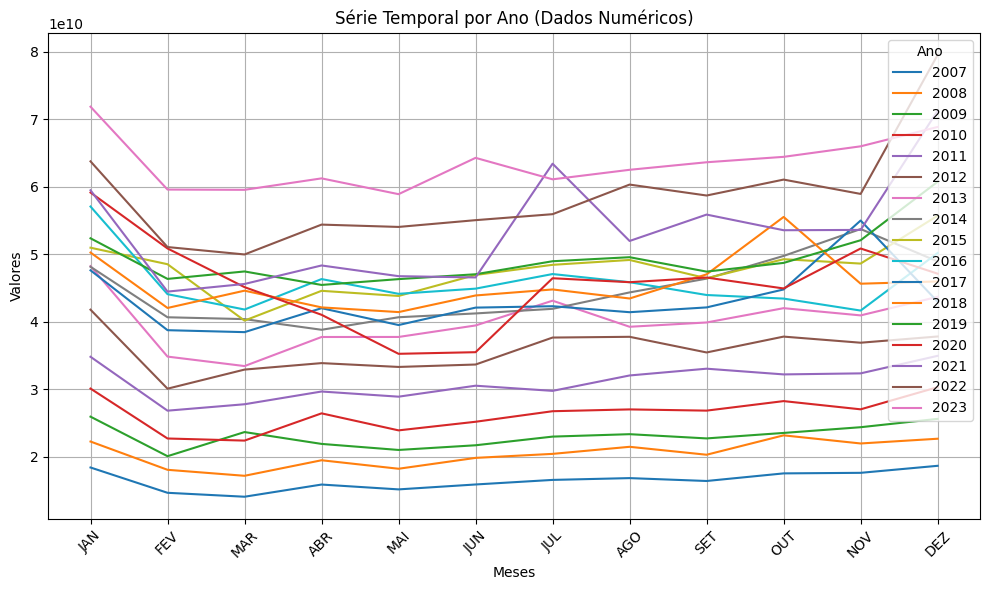

In [326]:
# Plotar gráfico de linha para ver a evolução dos valores ao longo dos anos
plt.figure(figsize=(10, 6))

# Plotar a série temporal para cada ano
for column in anos:
    plt.plot(data_clean['Unnamed: 0'], data_clean[column], label=column)

plt.title("Série Temporal por Ano (Dados Numéricos)")
plt.xlabel("Meses")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.legend(title="Ano")
plt.grid(True)
plt.tight_layout()
plt.show()

In [327]:
data_clean = data_clean.drop(columns=['Unnamed: 0']).values

# Exemplo de input para previsão
n_steps = 12  # Número de timesteps (12 valores usados para previsão)
n_features = 1  # Cada valor da sequência é univariado
neurons = [100]
layers = [5, 7, 10]
batch_sizes = [16]
epochs_list = [200]
results = []

# normalizando
scaler = MinMaxScaler(feature_range=(0, 1))
# Redimensionar a sequência de entrada para 2D, necessária para o scaler
data_reshaped = np.array(data_clean).reshape(-1, 1)
scaled_seq = scaler.fit_transform(data_reshaped)

#train = scaled_seq[:train_size]

# Verificar o tamanho dos dados
print("Tamanho dos dados:", scaled_seq.shape)



Tamanho dos dados: (204, 1)


In [328]:
display(scaled_seq)

array([[0.06615514],
       [0.12491275],
       [0.18120603],
       [0.24479171],
       [0.31673018],
       [0.42336991],
       [0.52193854],
       [0.52047288],
       [0.56363467],
       [0.6568347 ],
       [0.51246811],
       [0.5526714 ],
       [0.58494727],
       [0.68853607],
       [0.69364747],
       [0.75910313],
       [0.88278675],
       [0.00889683],
       [0.06093061],
       [0.09173153],
       [0.13180738],
       [0.19478047],
       [0.24453872],
       [0.31716736],
       [0.40619613],
       [0.52626947],
       [0.4584875 ],
       [0.37694322],
       [0.42727219],
       [0.49302228],
       [0.56193529],
       [0.46429044],
       [0.56511836],
       [0.69524861],
       [0.        ],
       [0.04737355],
       [0.14635761],
       [0.1270442 ],
       [0.20932158],
       [0.2877779 ],
       [0.29573438],
       [0.40201149],
       [0.39862306],
       [0.42371377],
       [0.37252372],
       [0.4663986 ],
       [0.50988876],
       [0.474

In [329]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# Exemplo de como dividir a sequência normalizada
X, y = split_sequence(scaled_seq.flatten(), n_steps)
display(X)
display(y)

array([[0.06615514, 0.12491275, 0.18120603, ..., 0.6568347 , 0.51246811,
        0.5526714 ],
       [0.12491275, 0.18120603, 0.24479171, ..., 0.51246811, 0.5526714 ,
        0.58494727],
       [0.18120603, 0.24479171, 0.31673018, ..., 0.5526714 , 0.58494727,
        0.68853607],
       ...,
       [0.17622434, 0.24798847, 0.31892694, ..., 0.48726617, 0.71290498,
        0.50484999],
       [0.24798847, 0.31892694, 0.36268547, ..., 0.71290498, 0.50484999,
        0.87374899],
       [0.31892694, 0.36268547, 0.4524647 , ..., 0.50484999, 0.87374899,
        1.        ]])

array([0.58494727, 0.68853607, 0.69364747, 0.75910313, 0.88278675,
       0.00889683, 0.06093061, 0.09173153, 0.13180738, 0.19478047,
       0.24453872, 0.31716736, 0.40619613, 0.52626947, 0.4584875 ,
       0.37694322, 0.42727219, 0.49302228, 0.56193529, 0.46429044,
       0.56511836, 0.69524861, 0.        , 0.04737355, 0.14635761,
       0.1270442 , 0.20932158, 0.2877779 , 0.29573438, 0.40201149,
       0.39862306, 0.42371377, 0.37252372, 0.4663986 , 0.50988876,
       0.47437735, 0.48156291, 0.54835917, 0.69464215, 0.02756164,
       0.08253582, 0.11955004, 0.18871788, 0.23813606, 0.30242249,
       0.36153583, 0.37787519, 0.46606626, 0.49263826, 0.42675666,
       0.42855119, 0.47936736, 0.4118026 , 0.52344354, 0.61593075,
       0.72057013, 0.01660264, 0.0633255 , 0.10585543, 0.15019162,
       0.22645514, 0.29375633, 0.36162479, 0.40625539, 0.45445405,
       0.45926319, 0.38859215, 0.41792913, 0.49253976, 0.32348117,
       0.49922593, 0.6106691 , 0.68482363, 0.0277217 , 0.08791

In [330]:
# split into samples
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Exemplo de divisão cronológica (70% treino, 20% validação, 10% teste)
# Isso resulta em:
#  - 70% para treinamento
#  - 20% para validação
#  - 10% para teste
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size

# Separar os dados
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:(train_size + val_size)], y[train_size:(train_size + val_size)]
X_test, y_test = X[(train_size + val_size):], y[(train_size + val_size):]


print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print(X_train)
print(y_train)
print(X_val)
print(y_val)
print(X_test)
print(y_test)


X_train shape: (134, 12, 1), y_train shape: (134,)
X_val shape: (38, 12, 1), y_val shape: (38,)
X_test shape: (20, 12, 1), y_test shape: (20,)
[[[0.06615514]
  [0.12491275]
  [0.18120603]
  ...
  [0.6568347 ]
  [0.51246811]
  [0.5526714 ]]

 [[0.12491275]
  [0.18120603]
  [0.24479171]
  ...
  [0.51246811]
  [0.5526714 ]
  [0.58494727]]

 [[0.18120603]
  [0.24479171]
  [0.31673018]
  ...
  [0.5526714 ]
  [0.58494727]
  [0.68853607]]

 ...

 [[0.54213887]
  [0.48557973]
  [0.57889328]
  ...
  [0.2897905 ]
  [0.32652407]
  [0.39440381]]

 [[0.48557973]
  [0.57889328]
  [0.70652652]
  ...
  [0.32652407]
  [0.39440381]
  [0.49364781]]

 [[0.57889328]
  [0.70652652]
  [0.73996959]
  ...
  [0.39440381]
  [0.49364781]
  [0.49441731]]]
[0.58494727 0.68853607 0.69364747 0.75910313 0.88278675 0.00889683
 0.06093061 0.09173153 0.13180738 0.19478047 0.24453872 0.31716736
 0.40619613 0.52626947 0.4584875  0.37694322 0.42727219 0.49302228
 0.56193529 0.46429044 0.56511836 0.69524861 0.         0.0473

In [331]:
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

In [332]:
#for n_neurons, n_layers, batch_size, epochs in product(neurons, layers, batch_sizes, epochs_list):
#    # Limpa a sessão do TensorFlow
#    tf.keras.backend.clear_session()
#    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
#    print(f"Treinando modelo com {n_neurons} neurônios, {n_layers} camadas, batch size {batch_size}, {epochs} épocas")
#    # Define o modelo sequencial
#    model = Sequential()
#    model.add(Input(shape=(n_steps, n_features)))
#    
#    # Adiciona camadas LSTM conforme o número de camadas (layers) especificado
#    for i in range(n_layers):
#        model.add(LSTM(n_neurons, activation='relu', return_sequences=(i < n_layers - 1)))
#        model.add(Dropout(0.2))
#    
#    # Camada de saída
#    model.add(Dense(1))
#    
#    # Compilando o modelo com a perda e métricas especificadas
#    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
#    
#    # Treina o modelo
#    history = model.fit(
#        X_train, y_train,
#        epochs=epochs,
#        batch_size=batch_size,
#        validation_data=(X_val, y_val),
#        callbacks=[early_stopping],
#        verbose=0
#    )
#
#    
#    # Armazena os resultados da última época (ou melhor época, se o Early Stopping for acionado)
#    results.append({
#        'neurons': n_neurons,
#        'layers': n_layers,
#        'batch_size': batch_size,
#        'epochs': epochs,
#        'val_loss': min(history.history['val_loss']),
#        'val_mae': min(history.history['val_mae']),
#        'val_mape': min(history.history['val_mape'])
#    })
#
## Converte os resultados para um DataFrame para fácil visualização e análise
#results_df = pd.DataFrame(results)
#best_result = results_df.loc[results_df['val_mape'].idxmin()]
#display(results_df)
#display(best_result)

In [333]:
#display(int(best_result['neurons']))
#display(int(best_result['layers']))
#display(int(best_result['batch_size']))
#display(int(best_result['epochs']))

In [334]:
# define model
i = 0
#tf.keras.backend.clear_session()
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

# Modelo LSTM ajustado para saída de 12 passos
model = Sequential()
model.add(Input(shape=(n_steps, n_features)))
for i in range(10):
    model.add(LSTM(100, activation='relu', return_sequences=(i < 10 - 1)))
    model.add(Dropout(0.2))  # Opcional para regularização

# Camada de saída com 1 neurônios para prever 12 meses
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

# Treina o modelo
history = model.fit(
    X_train, y_train,
    epochs=8500,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=0
)


In [335]:
val_loss, val_mae, val_mape = model.evaluate(X_val, y_val, steps=12, verbose=1)
print(f'Test MSE: {val_loss}, Test MAE: {val_mae}, Test MAPE: {val_mape}')

# Avaliar o modelo no conjunto de teste
test_loss, test_mae, test_mape = model.evaluate(X_test, y_test, steps=12, verbose=1)
print(f'Test MSE: {test_loss}, Test MAE: {test_mae}, Test MAPE: {test_mape}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mae: 0.0630 - mape: 22.0345  
Test MSE: 0.011761870235204697, Test MAE: 0.06718006730079651, Test MAPE: 21.309814453125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0260 - mae: 0.0964 - mape: 25.4920   
Test MSE: 0.04519543796777725, Test MAE: 0.13495148718357086, Test MAPE: 25.677343368530273


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


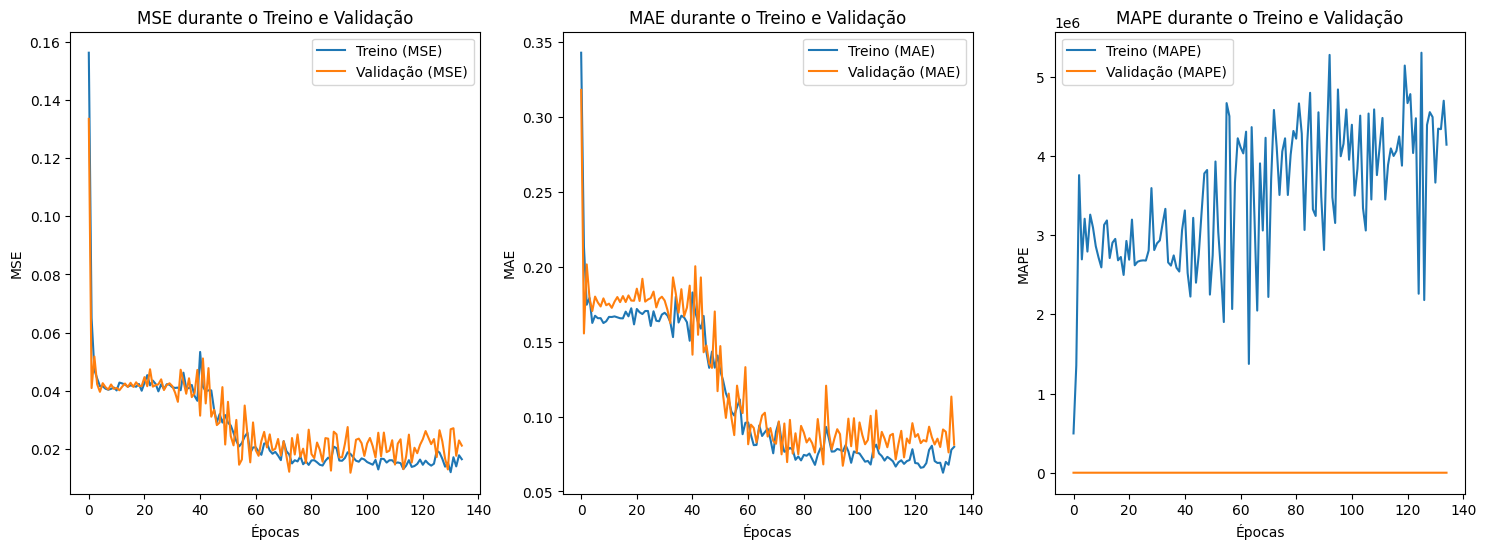

In [336]:
# Função para plotar o gráfico de treino e validação
def plot_training_history(history):
    plt.figure(figsize=(18, 6))

    # Plotar o erro quadrático médio (MSE) durante o treino e validação
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Treino (MSE)')
    plt.plot(history.history['val_loss'], label='Validação (MSE)')
    plt.title('MSE durante o Treino e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.legend()

    # Plotar o erro absoluto médio (MAE) durante o treino e validação
    plt.subplot(1, 3, 2)
    plt.plot(history.history['mae'], label='Treino (MAE)')
    plt.plot(history.history['val_mae'], label='Validação (MAE)')
    plt.title('MAE durante o Treino e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()


    # Plotar o erro absoluto percentual médio (MAPE) durante o treino e validação
    plt.subplot(1, 3, 3)
    plt.plot(history.history['mape'], label='Treino (MAPE)')
    plt.plot(history.history['val_mape'], label='Validação (MAPE)')
    plt.title('MAPE durante o Treino e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('MAPE')
    plt.legend()


    plt.show()

# Plotar o histórico de treinamento
plot_training_history(history)

In [337]:
display(history.history)

{'loss': [0.1562972217798233,
  0.06499779224395752,
  0.047175757586956024,
  0.044182319194078445,
  0.041550587862730026,
  0.04148370400071144,
  0.040674738585948944,
  0.040325045585632324,
  0.040621478110551834,
  0.041081059724092484,
  0.04008173942565918,
  0.04278239980340004,
  0.04249804466962814,
  0.04209495335817337,
  0.04137810319662094,
  0.04181020334362984,
  0.04161959886550903,
  0.041359562426805496,
  0.042307715862989426,
  0.03997936472296715,
  0.04264393076300621,
  0.04534842446446419,
  0.04181898385286331,
  0.04347469285130501,
  0.04233168810606003,
  0.039762016385793686,
  0.04221757501363754,
  0.040540821850299835,
  0.042214829474687576,
  0.04206886887550354,
  0.04120155796408653,
  0.04094351828098297,
  0.04105431213974953,
  0.04014362022280693,
  0.04618533328175545,
  0.04082169756293297,
  0.04085357114672661,
  0.041952744126319885,
  0.038175858557224274,
  0.036513395607471466,
  0.05332640931010246,
  0.04132411256432533,
  0.03983887

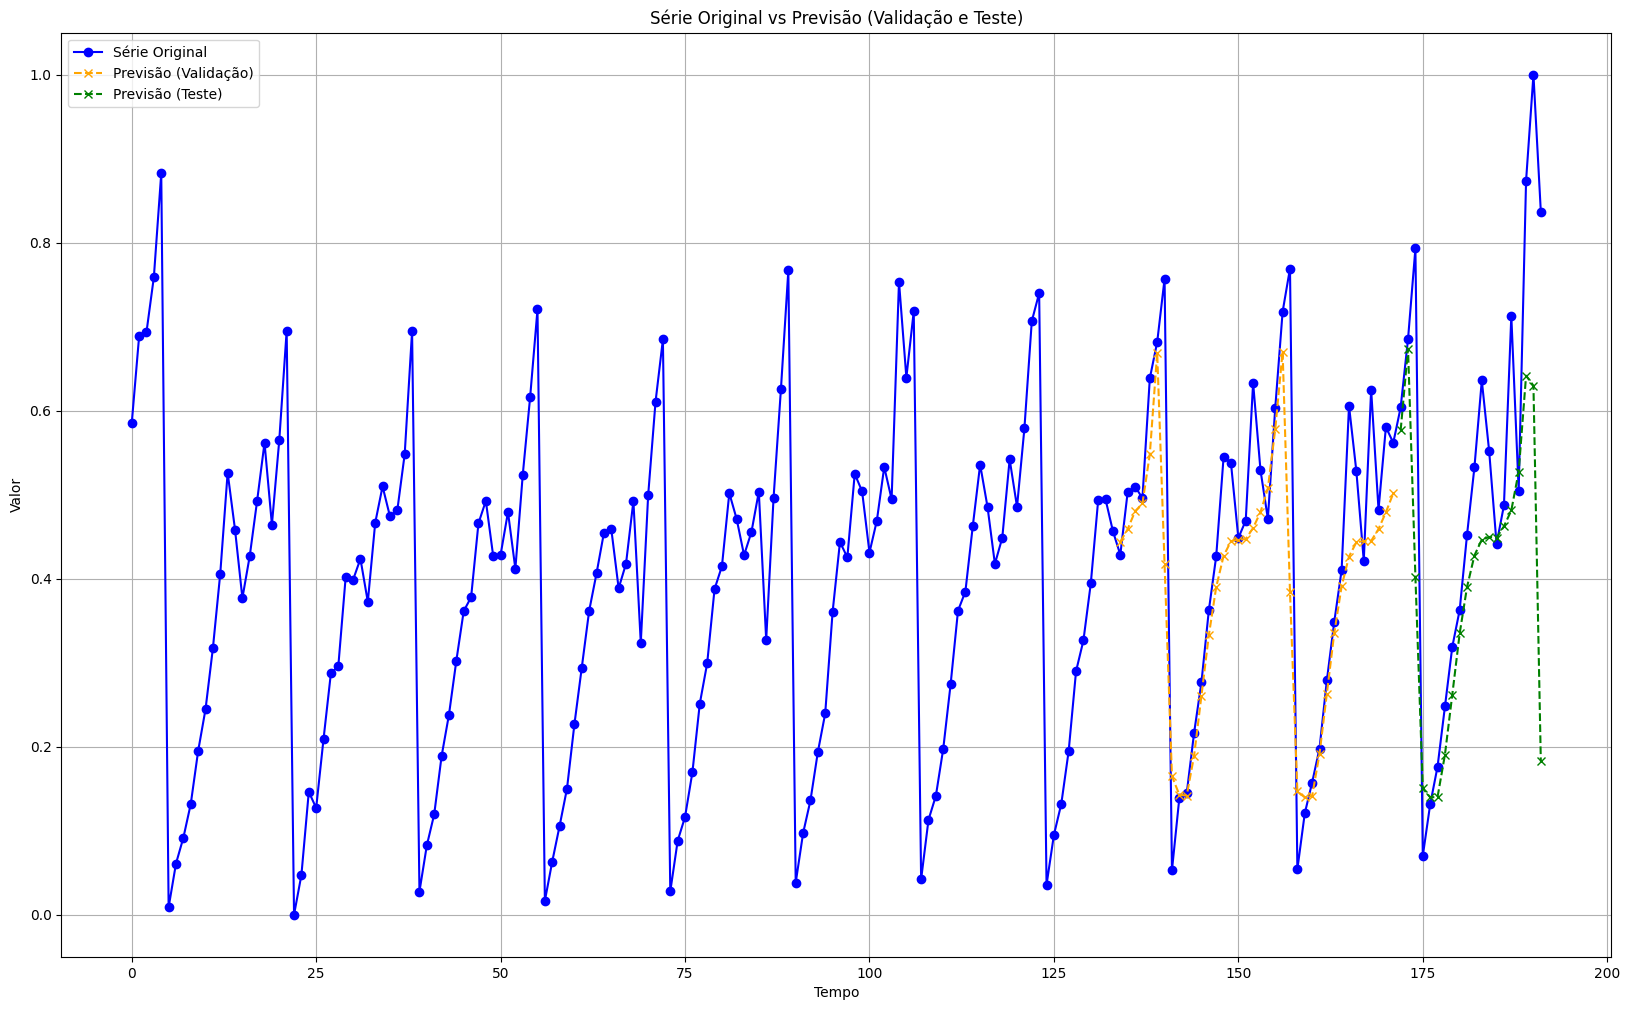

In [338]:
y_val_pred = model.predict(X_val, verbose=0)
y_test_pred = model.predict(X_test, verbose=0)
# Função para plotar a série original e as previsões
def plot_original_vs_predicted(y_train, y_val, y_test, y_val_pred, y_test_pred):
    plt.figure(figsize=(20, 12))

    # Concatena a série original completa (treino + validação + teste)
    total_y = np.concatenate([y_train, y_val, y_test], axis=0)

    # Concatena as previsões (com NaNs para o início onde não há previsão)
    val_preds = np.concatenate([np.full_like(y_train, np.nan), y_val_pred.flatten()])
    test_preds = np.concatenate([np.full_like(np.concatenate([y_train, y_val]), np.nan), y_test_pred.flatten()])

    # Plotar a série original
    plt.plot(total_y, label='Série Original', color='blue', marker='o')

    # Plotar as previsões de validação
    plt.plot(val_preds, label='Previsão (Validação)', color='orange', linestyle='dashed', marker='x')

    # Plotar as previsões de teste
    plt.plot(test_preds, label='Previsão (Teste)', color='green', linestyle='dashed', marker='x')

    # Adicionar legendas e títulos
    plt.title('Série Original vs Previsão (Validação e Teste)')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

# Chamar a função para plotar
plot_original_vs_predicted(y_train, y_val, y_test, y_val_pred, y_test_pred)




